In [2]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [13]:
#Exercicio 1
def newton_raphson(f, df, x, tol=10e-10, itera=100):
    e = []
    X0 = [x]
    Xi = []
    erro = np.inf
    while(erro > tol):
        X_it = X0[-1] - f(X0[-1])/df(X0[-1])
        erro = np.abs((X_it - X0[-1])/X_it)
        X0.append(X_it)
        Xi.append(X_it)
        e.append(erro)
    return X0, Xi, e

def fixed_point(f, x, tol=10e-10):
    e = []
    X0 = [x]
    Xi = []
    erro = np.inf
    while(erro > tol):
        X_it = f(X0[-1])
        erro = np.abs((X_it - X0[-1])/X_it)
        X0.append(X_it)
        Xi.append(X_it)
        e.append(erro)
   
    return X0, Xi, e

def secante(f,x,tol=10e-10):
    e = []
    X0 = [0,x]
    Xi = []
    erro = np.inf
 
    while(erro > tol):
        X_it = X0[-1] - (f(X0[-1])*(X0[-2] - X0[-1])) / (f(X0[-2]) - f(X0[-1]))
        erro = np.abs((X_it - X0[-1])/X_it)
        X0.append(X_it)
        Xi.append(X_it)
        e.append(erro)
       
    return X0, Xi, e

def brents(f, x0, x1, max_iter=50, tolerance=1e-5):
 
    fx0 = f(x0)
    fx1 = f(x1)
 
    assert (fx0 * fx1) <= 0, "Root not bracketed" 
 
    if abs(fx0) < abs(fx1):
        x0, x1 = x1, x0
        fx0, fx1 = fx1, fx0
 
    x2, fx2 = x0, fx0
 
    mflag = True
    steps_taken = 0
 
    while steps_taken < max_iter and abs(x1-x0) > tolerance:
        fx0 = f(x0)
        fx1 = f(x1)
        fx2 = f(x2)
 
        if fx0 != fx2 and fx1 != fx2:
            L0 = (x0 * fx1 * fx2) / ((fx0 - fx1) * (fx0 - fx2))
            L1 = (x1 * fx0 * fx2) / ((fx1 - fx0) * (fx1 - fx2))
            L2 = (x2 * fx1 * fx0) / ((fx2 - fx0) * (fx2 - fx1))
            new = L0 + L1 + L2
 
        else:
            new = x1 - ( (fx1 * (x1 - x0)) / (fx1 - fx0) )
 
        if ((new < ((3 * x0 + x1) / 4) or new > x1) or
            (mflag == True and (abs(new - x1)) >= (abs(x1 - x2) / 2)) or
            (mflag == False and (abs(new - x1)) >= (abs(x2 - d) / 2)) or
            (mflag == True and (abs(x1 - x2)) < tolerance) or
            (mflag == False and (abs(x2 - d)) < tolerance)):
            new = (x0 + x1) / 2
            mflag = True
 
        else:
            mflag = False
 
        fnew = f(new)
        d, x2 = x2, x1
 
        if (fx0 * fnew) < 0:
            x1 = new
        else:
            x0 = new
 
        if abs(fx0) < abs(fx1):
            x0, x1 = x1, x0
 
        steps_taken += 1
 
    return x1, steps_taken

Secante:     (1.4928787086635993, 5)
newton:      (1.4928787086636037, 4)
Ponto Fixo:  (-1.3003841327965273, 24)
Brent:       (1.4928787086636037, 50)


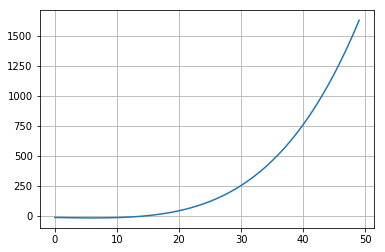

In [19]:
f1 = lambda x:2*x**4 + 4*x**3 + 3*x**2 - 10*x - 15
f1linha = lambda x:8*x**3 + 12*x**2 + 6*x -10
g1 = lambda x:15/(2*x**3 + 4*x**2 + 3*x -10)
plt.plot(f1(np.arange(0,5,0.1)))
plt.grid(True)
xo,xi0,e0 = secante(f1,1.5, tol=10e-10)
xo,xi1,e1 = newton_raphson(f1,f1linha, 1.5, tol=10e-10)
xo,xi2,e2 = fixed_point(g1,1.5, tol=10e-10)
print("Secante:    ", (xi0[-1], len(e0)))
print("newton:     ", (xi1[-1], len(e1)))
print("Ponto Fixo: ", (xi2[-1], len(e2)))
print("Brent:      ", brents(f1,0, 3,tolerance=10-10))

Secante:     (2.0000000031768277, 42)
newton:      (2.000123294956096, 61667)


AssertionError: Root not bracketed

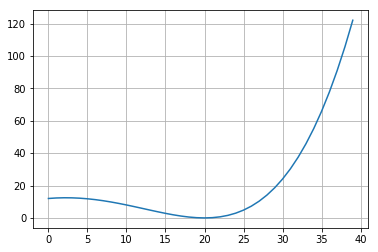

In [23]:
f2 = lambda x:(x+3)*(x+1)*((x-2)**2)
f2linha = lambda x:8*x**3 + 12*x**2 + 6*x -10
g2 = lambda x:(x+3)*(x+1)*(x-2)**2
plt.plot(f2(np.arange(0,4,0.1)))
plt.grid(True)
xo,xi0,e0 = secante(f2,2.5, tol=10e-10)
xo,xi1,e1 = newton_raphson(f2,f2Linha, 2.5, tol=10e-10)
print("Secante:    ", (xi0[-1], len(e0)))
print("newton:     ", (xi1[-1], len(e1)))
print("Brent:      ", brents(f2, 0 , 5,tolerance=10-10))

Secante:     (-0.9295604598378412, 14)
newton:      (-0.9295604598378412, 11)
Brent:       (-0.9295604598378412, 50)


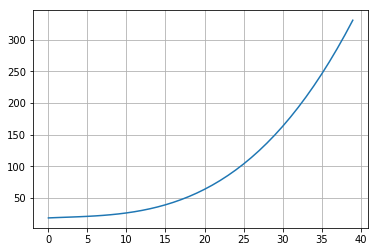

In [24]:
f3 = lambda x:5*x**3 + x**2 - np.exp(1-2*x) + np.cos(x) + 20
f3linha = lambda x:15*x**2 + 2*x + 2*np.exp(1-2*x) - np.sin(x)
g3 = lambda x:(x+3)*(x+1)*(x-2)**2
plt.plot(f3(np.arange(0,4,0.1)))
xo,xi0,e0 = secante(f3,5, tol=10e-10)
xo,xi1,e1 = newton_raphson(f3,f3Linha, 5, tol=10e-10)
plt.grid(True)
print("Secante:    ", (xi0[-1], len(e0)))
print("newton:     ", (xi1[-1], len(e1)))
print("Brent:      ", brents(f3,-5, 5,tolerance=10-10))

Ponto Fixo:   5.461308012588998
Secante:     (5.461308012588998, 13)
newton:      (4.323239543713714, 6)
Brent:       (4.323239543713715, 50)


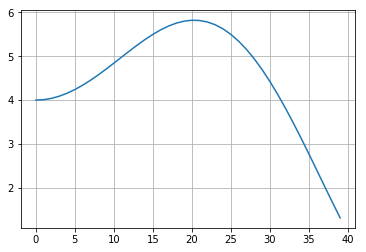

In [26]:
f4 = lambda x:np.sin(x)*x + 4
f4linha = lambda x:np.cos(x)*x + np.sin(x)
g4 = lambda x:np.sin(x)*x + 4 + x
plt.plot(f4(np.arange(0,4,0.1)))
plt.grid(True)
xo,xi0,e0 = secante(f4,3, tol=10e-10)
xo,xi1,e1 = newton_raphson(f4,f4Linha, 3, tol=10e-10)
print("Ponto Fixo:  ",opt.fixed_point(g4,3))
print("Secante:    ", (xi0[-1], len(e0)))
print("newton:     ", (xi1[-1], len(e1)))
print("Brent:      ", brents(f4,1, 5,tolerance=10-10))

Secante:     (3.5, 1)
newton:      (4.999999980146746, 81)
Brent:       (5, 1)


/home/joao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


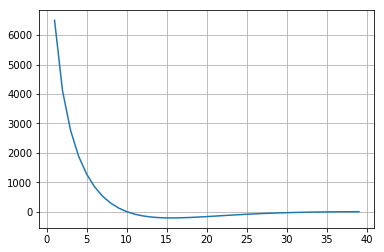

In [29]:
f5 = lambda x:(x-5)**5*np.log(x)
f5linha = lambda x:5*(x-5)**4*np.log(x) + (x-5)**5*(1/x)
g5 = lambda x:np.sin(x)*x + 4 + x
plt.plot(f5(np.arange(0,4,0.1)))
plt.grid(True)
xo,xi0,e0 = secante(f5,3.5, tol=10e-10)
xo,xi1,e1 = newton_raphson(f5,f5Linha, 3.5, tol=10e-10)
print("Secante:    ", (xi0[-1], len(e0)))
print("newton:     ", (xi1[-1], len(e1)))
print("Brent:      ", brents(f5,2, 5,tolerance=10-10))

newton:      (1.0, 17)
Brent:       (5, 1)


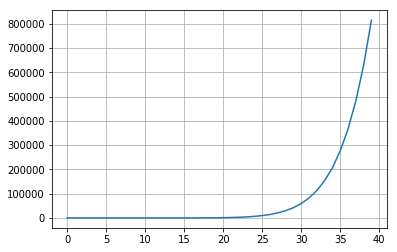

In [32]:
f6 = lambda x: (x)**10 -1
f6linha = lambda x: 10*(x**9)
plt.plot(f6(np.arange(0,4,0.1)))
plt.grid(True)
#xo,xi0,e0 = secante(f6,3.5, tol=10e-10)
xo,xi1,e1 = newton_raphson(f6,f6linha, 3.5, tol=10e-10)
#print("Secante:    ", (xi0[-1], len(e0)))
print("newton:     ", (xi1[-1], len(e1)))
print("Brent:      ", brents(f5,2, 5,tolerance=10-10))

Questão 2


A) M = 4wb - 4tb - 24ts.cos(theta) - 38ts.sen(theta)

Com os valores substituidos e implementado na função temos:

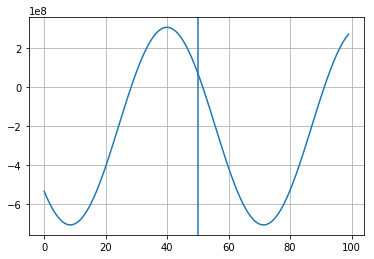

In [40]:
def m(x):
    return -20*10e6 + 27*10e6*np.cos(x) - 42.75*10e6*np.sin(x)
plt.plot(m(np.arange(-5,5, 0.1)))
plt.grid(True)
plt.axvline(x=50)

B) Para o momento angular ser zero possibilitando a decolagem da aeronave, utilizamos o metodo da biseção para encontrar uma raiz.

In [41]:
opt.bisect(m,0,1)

0.15664925267083163

C) Com o aumento da carga util, o angulo(theta) também aumenta até que a decolagem não possa mais ser realizada. O foguete pode realizar lançamento sem carga útil,  pois ainda há raiz real para a função. Para que a aeronave fique impossibilitada de decolar, a função não pode ter raiz real, ou seja ws > 38.33*10e6